<a href="https://colab.research.google.com/github/rafid29/Analyst-Sales-Trend/blob/main/Analyst_Sales_Trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: create code for conecting kaggle daataset

!pip install kaggle
from google.colab import files

# Upload your Kaggle API key
uploaded = files.upload()

# Create a Kaggle API client
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the dataset
!kaggle datasets download -d andrewmvd/animal-crossing-new-horizons-nookplaza-catalog
!unzip animal-crossing-new-horizons-nookplaza-catalog.zip


Saving archive (11).zip to archive (11).zip
mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
403 - Forbidden - Permission 'datasets.get' was denied
unzip:  cannot find or open animal-crossing-new-horizons-nookplaza-catalog.zip, animal-crossing-new-horizons-nookplaza-catalog.zip.zip or animal-crossing-new-horizons-nookplaza-catalog.zip.ZIP.


In [5]:
# prompt: convert file zip

import zipfile
!unzip \*.zip && rm *.zip

Archive:  archive (11).zip
  inflating: Online Sales Data.csv   


In [6]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#read dataset
df = pd.read_csv('Online Sales Data.csv')
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


**Data Review**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [9]:
print(f'Jumlah data duplicated: {df.duplicated().sum()}')

Jumlah data duplicated: 0


In [10]:
print(f'Jumlah data yang kosong: {df.isna().sum()}')

Jumlah data yang kosong: Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


**Cleaning data**

1. Memperbaiki format penulisan nama column

In [11]:
df.rename(columns={'Units Sold': 'Quantity'}, inplace=True)
df.head()

,Transaction ID,Date,Product Category,Product Name,Quantity,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


2. mengubah typedata pada column date, region, and payment methode

In [12]:
#change typedata column date
df['Date'] = pd.to_datetime(df['Date'])
df['Region'] = df['Region'].astype('category')
df['Payment Method'] = df['Payment Method'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Quantity          240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    category      
 8   Payment Method    240 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 14.0+ KB


In [46]:
df.head(240)

,Transaction ID,Date,Product Category,Product Name,Quantity,Unit Price,Total Revenue,Region,Payment Method,month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,1
...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal,8
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card,8
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card,8
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal,8


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Quantity          240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    category      
 8   Payment Method    240 non-null    category      
 9   month             240 non-null    int32         
dtypes: category(2), datetime64[ns](1), float64(2), int32(1), int64(2), object(2)
memory usage: 14.9+ KB


**Analyst**

1. Analyze sales trends over time to identify seasonal patterns or growth opportunities.
2. Explore the popularity of different product categories across regions.
3. Investigate the impact of payment methods on sales volume or revenue.
4. Identify top-selling products within each category to optimize inventory and marketing strategies.
5. Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

In [55]:
df.describe()

,Transaction ID,Date,Quantity,Unit Price,Total Revenue,month
count,240.00000,240,240.000000,240.000000,240.000000,240.000000
mean,10120.50000,2024-04-29 12:00:00,2.158333,236.395583,335.699375,4.458333
min,10001.00000,2024-01-01 00:00:00,1.000000,6.500000,6.500000,1.000000
25%,10060.75000,2024-02-29 18:00:00,1.000000,29.500000,62.965000,2.750000
50%,10120.50000,2024-04-29 12:00:00,2.000000,89.990000,179.970000,4.000000
75%,10180.25000,2024-06-28 06:00:00,3.000000,249.990000,399.225000,6.000000
max,10240.00000,2024-08-27 00:00:00,10.000000,3899.990000,3899.990000,8.000000
std,69.42622,NaN,1.322454,429.446695,485.804469,2.275560


In [66]:
#analyze sales trends over time to identify seasonal pattern or growth opportunities

df['month'] = df['Date'].dt.month
# Mengelompokkan berdasarkan bulan dan menjumlahkan penjualan
month_sales = df.groupby('month')['Quantity'].sum()
year_sales = df.groupby(df['Date'].dt.year)['Quantity'].sum()
avg_month_sales = df.groupby('month')['Quantity'].mean()

year_reveneue = df.groupby(df['Date'].dt.year)['Total Revenue'].sum()
month_revenue = df.groupby('month')['Total Revenue'].sum()


month_sales



month
1    68
2    77
3    82
4    65
5    60
6    61
7    53
8    52
Name: Quantity, dtype: int64

In [70]:
print(f'jumlah penjualan per tahun: \n{year_sales}')

print(f'jumlah penjualan per bulan: \n{month_sales}')

print(f'Rata-rata penjualan per bulan: \n{avg_month_sales}')

print(f'Rata-rata revenue per tahun: \n{year_reveneue}')

print(f'Rata-rata revenue per bulan: \n{month_revenue}')

jumlah penjualan per tahun: 
Date
2024    518
Name: Quantity, dtype: int64
jumlah penjualan per bulan: 
month
1    68
2    77
3    82
4    65
5    60
6    61
7    53
8    52
Name: Quantity, dtype: int64
Rata-rata penjualan per bulan: 
month
1    2.193548
2    2.655172
3    2.645161
4    2.166667
5    1.935484
6    2.033333
7    1.709677
8    1.925926
Name: Quantity, dtype: float64
Rata-rata revenue per tahun: 
Date
2024    80567.85
Name: Total Revenue, dtype: float64
Rata-rata revenue per bulan: 
month
1    14548.32
2    10803.37
3    12849.24
4    12451.69
5     8455.49
6     7384.55
7     6797.08
8     7278.11
Name: Total Revenue, dtype: float64


Visualisasi

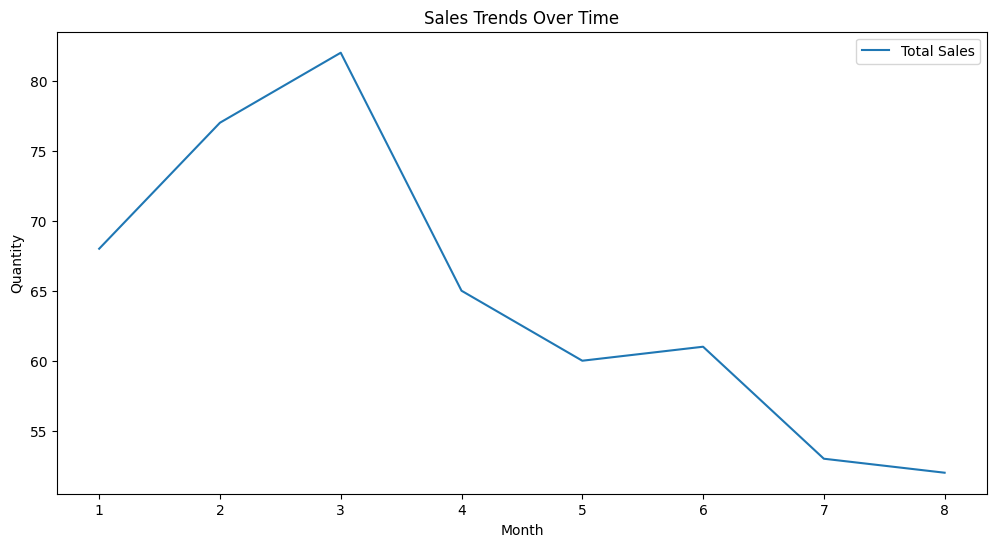

In [68]:
plt.figure(figsize=(12,6))
plt.plot(month_sales.index, month_sales.values, label='Total Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.show()

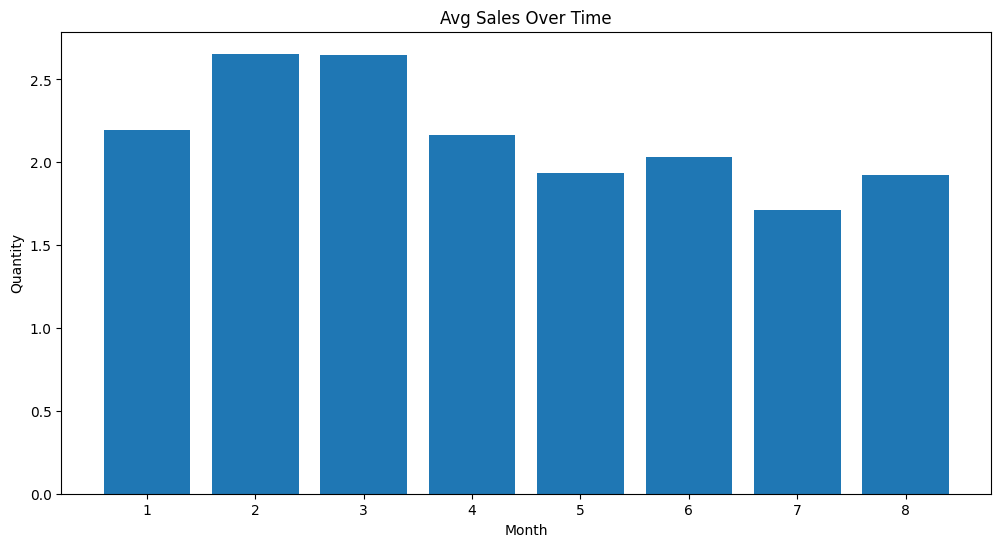

In [73]:
plt.figure(figsize=(12,6))
plt.bar(avg_month_sales.index, avg_month_sales.values)
plt.title('Avg Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.show()

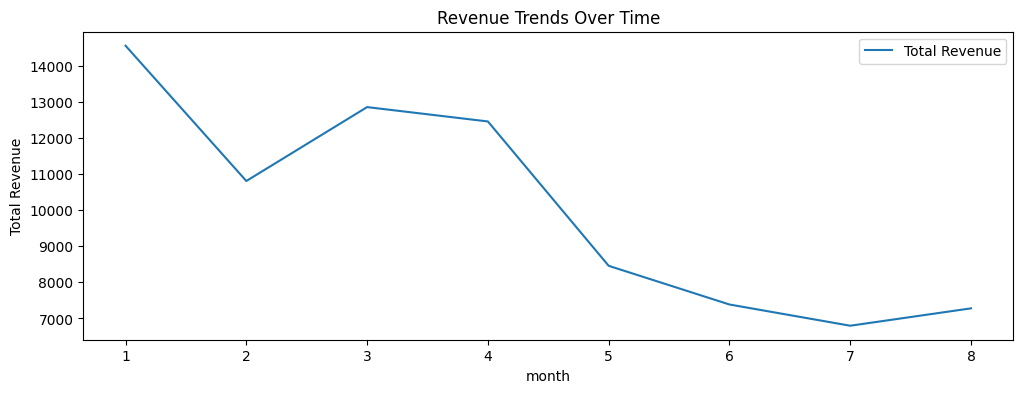

In [74]:
plt.figure(figsize=(12,4))
plt.plot(month_revenue.index, month_revenue.values, label='Total Revenue')
plt.title('Revenue Trends Over Time')
plt.xlabel('month')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

In [81]:
# 2.Explore the popularity of different product categories across regions.

# Mengelompokkan data berdasarkan wilayah dan kategori produk, lalu menghitung jumlah unit terjual
category_region_sales = df.groupby(['Region', 'Product Category'])['Quantity'].sum().unstack().fillna(0)

category_region_sales.head()



Product Category,Beauty Products,Books,Clothing,Electronics,Home Appliances,Sports
Region,,,,,,
Asia,0,0,145,0,0,88
Europe,46,0,0,0,59,0
North America,0,114,0,66,0,0


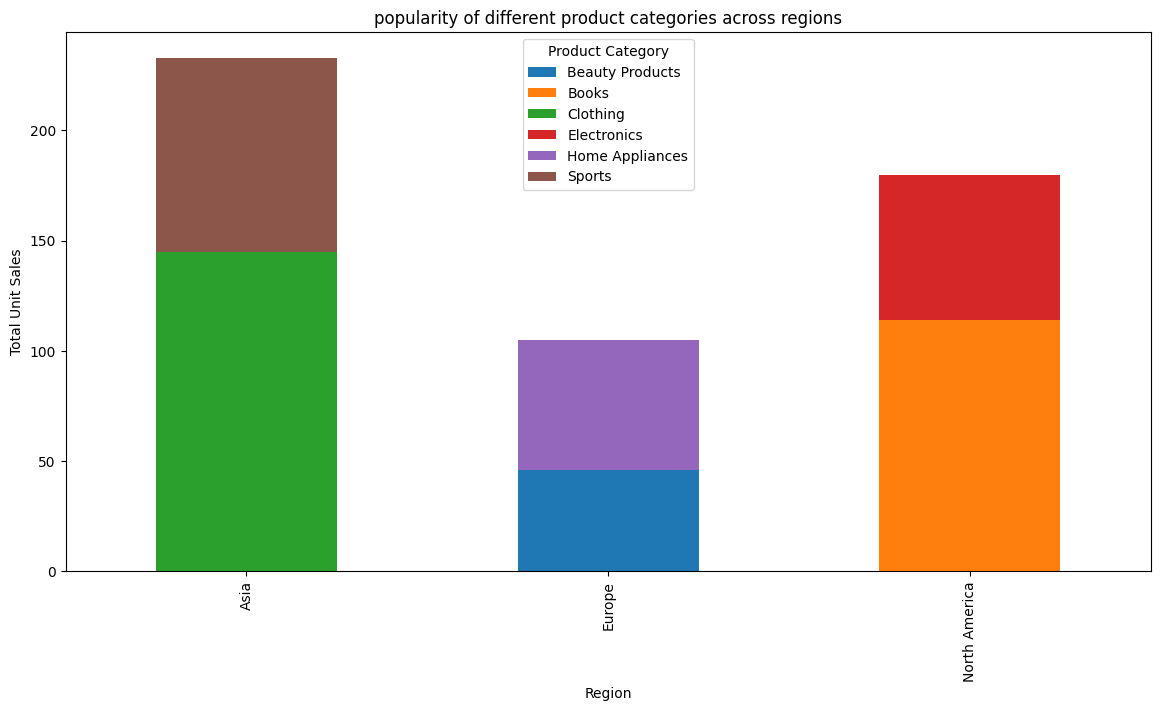

In [83]:
# Plot popularitas kategori produk di berbagai wilayah
category_region_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('popularity of different product categories across regions')
plt.xlabel('Region')
plt.ylabel('Total Unit Sales')
plt.legend(title='Product Category')
plt.show()

In [96]:
payment_method_sales = df.groupby('Payment Method').agg({'Quantity': 'sum', 'Total Revenue': 'sum'})
payment_method_sales

,Quantity,Total Revenue
Payment Method,,
Credit Card,268,51170.86
Debit Card,145,8128.93
PayPal,105,21268.06


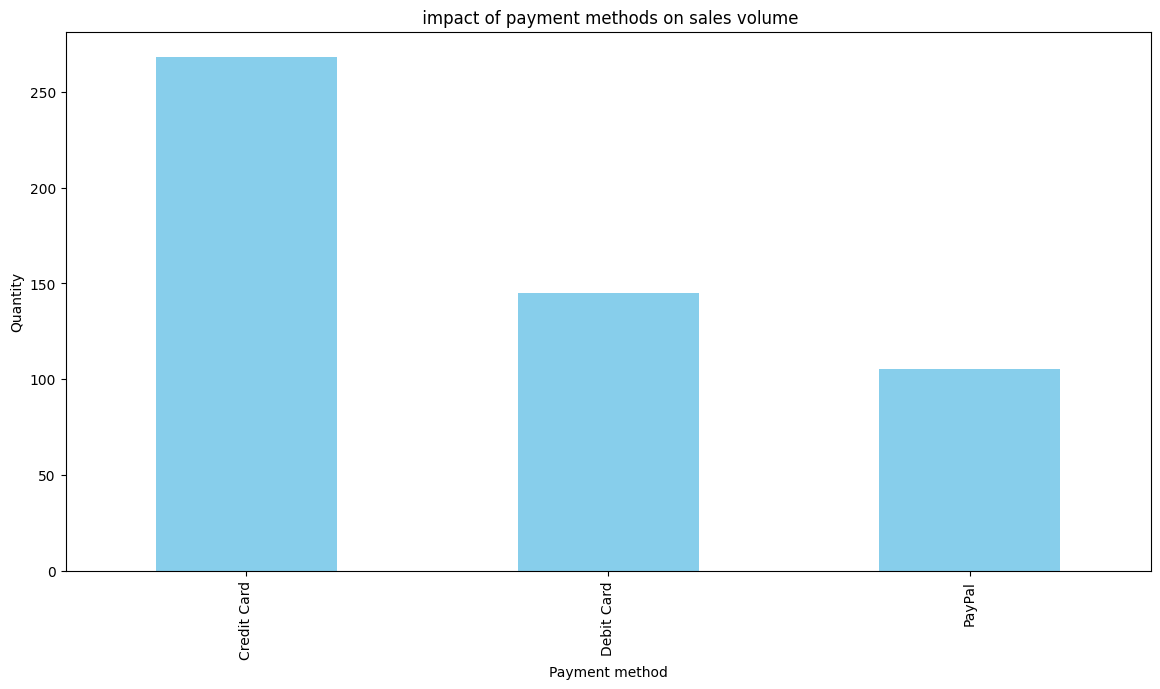

In [97]:
# Plot dampak metode pembayaran terhadap volume penjualan
payment_method_sales['Quantity'].plot(kind='bar', color='skyblue', figsize=(14, 7))
plt.title(' impact of payment methods on sales volume')
plt.xlabel('Payment method')
plt.ylabel('Quantity')
plt.show()




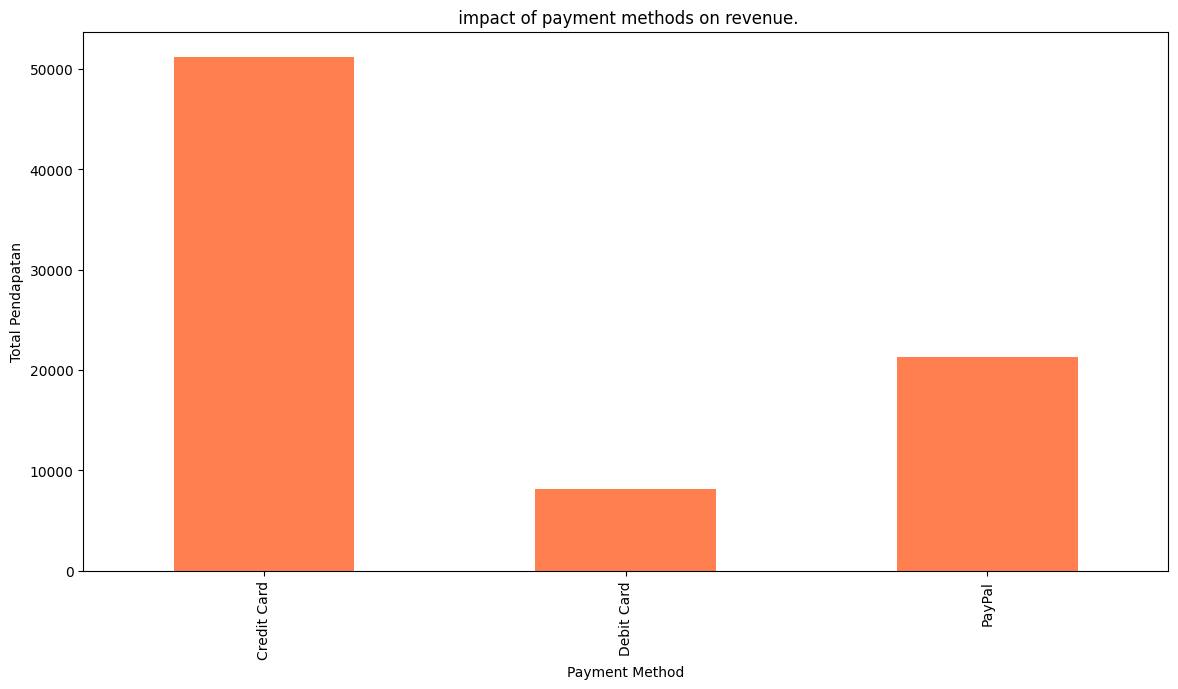

In [94]:
# Plot dampak metode pembayaran terhadap total pendapatan
payment_method_sales['Total Revenue'].plot(kind='bar', color='coral', figsize=(14, 7))
plt.title(' impact of payment methods on revenue.')
plt.xlabel('Payment Method')
plt.ylabel('Total Pendapatan')
plt.show()

In [103]:
#Identify top-selling products within each category to optimize inventory and marketing strategies.
top_product = df.groupby(['Product Category', 'Product Name'])['Quantity'].sum().reset_index()
top_product = top_product.sort_values(by='Quantity', ascending=False).groupby('Product Category').head(5)
top_product.head()

,Product Category,Product Name,Quantity
91,Clothing,Hanes ComfortSoft T-Shirt,10
52,Books,The Catcher in the Rye by J.D. Salinger,7
98,Clothing,Nike Air Force 1,6
88,Clothing,Gap Essential Crewneck T-Shirt,6
220,Sports,Spalding NBA Street Basketball,6


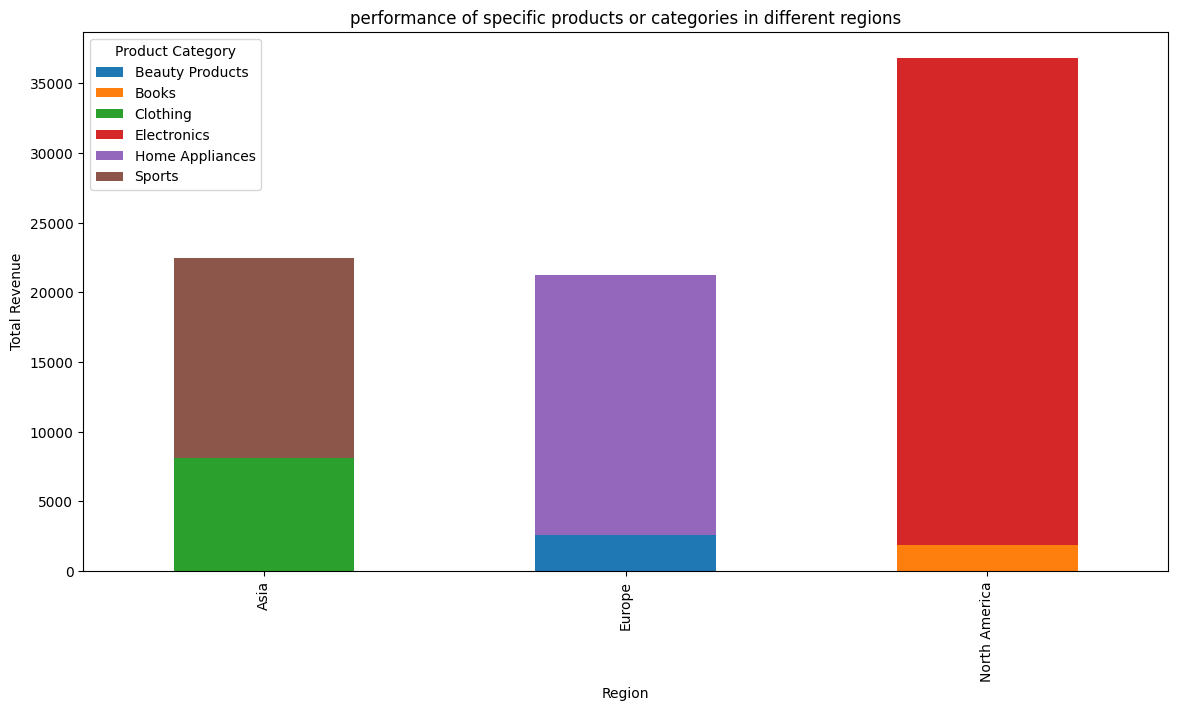

In [105]:
#Evaluate the performance of specific products or categories in different regions to tailor marketing campaigns accordingly.

category_region_revenue = df.groupby(['Region', 'Product Category'])['Total Revenue'].sum().unstack().fillna(0)

category_region_revenue.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('performance of specific products or categories in different regions')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.show()